# WORKING WITH MALARIA DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reported = pd.read_csv("reported_numbers.csv")

In [3]:
df = pd.DataFrame(reported)
df.head(15)

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe
5,Azerbaijan,2017,0.0,NaN,Europe
6,Bangladesh,2017,4893.0,13.0,South-East Asia
7,Belize,2017,7.0,0.0,Americas
8,Benin,2017,1573163.0,2182.0,Africa
9,Bhutan,2017,24.0,1.0,South-East Asia


## DATA CLEANING

In [4]:
len(df.Country.unique())

108

In [5]:
df.Year.value_counts()

2017    108
2016    108
2001    108
2002    108
2003    108
2004    108
2005    108
2006    108
2007    108
2008    108
2009    108
2010    108
2011    108
2012    108
2013    108
2014    108
2015    108
2000    108
Name: Year, dtype: int64

In [6]:
df.shape

(1944, 5)

In [7]:
df.isnull().sum()

Country            0
Year               0
No. of cases     234
No. of deaths    269
WHO Region         0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

In [10]:
df.shape

(1554, 5)

## DATA VISUALISATION AND ANALYSIS

### ANALYSING AND VISUALISING DATA GROUPED COUNTRY WISE

In [11]:
df1 = df.groupby('Country')["No. of cases","No. of deaths"].sum().reset_index()
df1.head()

C:\Users\Sanchit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country,No. of cases,No. of deaths
0,Afghanistan,1045271.0,363.0
1,Algeria,1044.0,4.0
2,Angola,26006152.0,125364.0
3,Argentina,2098.0,2.0
4,Armenia,355.0,0.0


In [12]:
df2 = df1[["Country","No. of cases"]]
df2.head()

,Country,No. of cases
0,Afghanistan,1045271.0
1,Algeria,1044.0
2,Angola,26006152.0
3,Argentina,2098.0
4,Armenia,355.0


In [13]:
df2 = df2.sort_values("No. of cases", ascending = False)

In [14]:
#the following function allows me to print the data on the top of my bars
def data_graph (axis, width, height):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    for p in axis.patches:
        axis.annotate ("{0:.1f}".format(p.get_height()), (p.get_x()+width, p.get_height()+height))

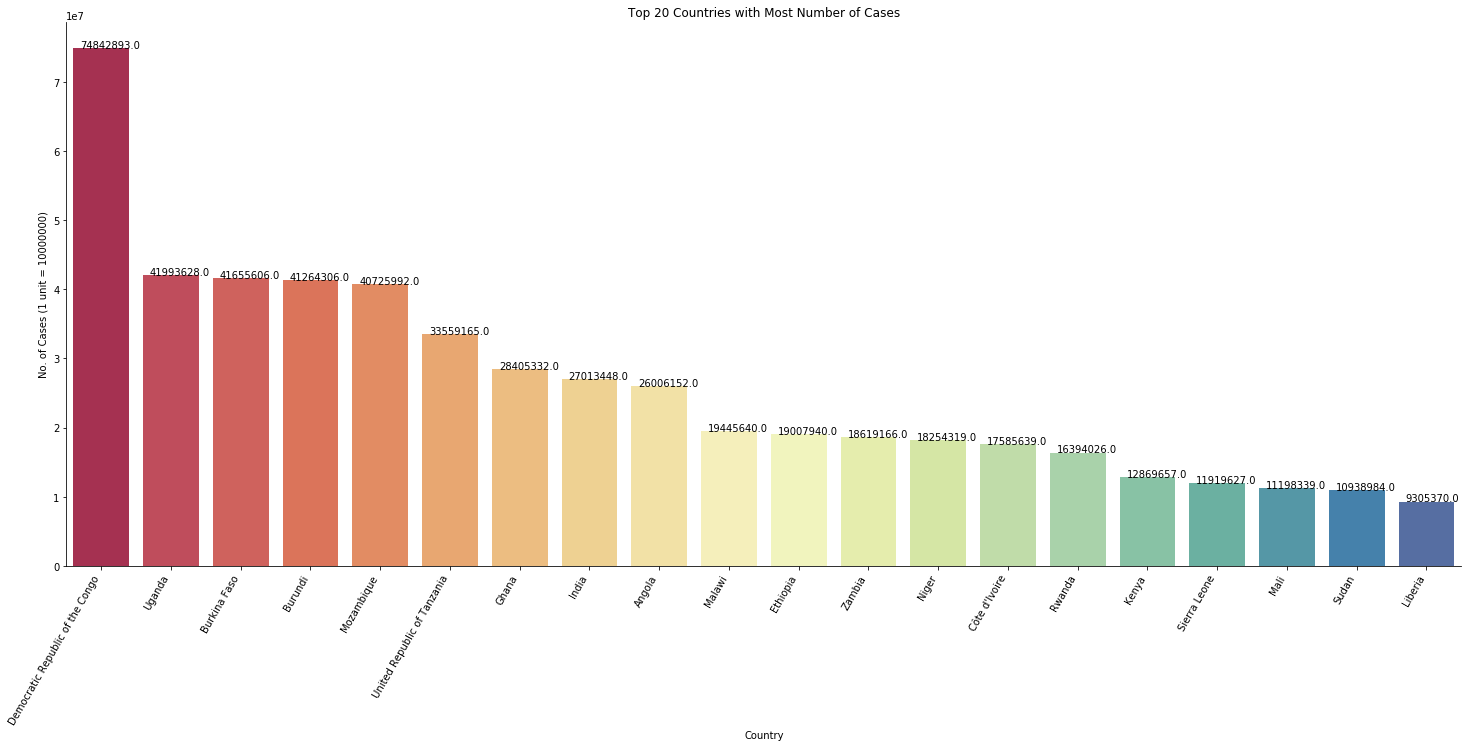

In [15]:
plt.figure(figsize = (25,10))
ax = sns.barplot(x="Country", y= "No. of cases", data=df2[:20] ,palette = "Spectral")
plt.title ("Top 20 Countries with Most Number of Cases")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of Cases (1 unit = 10000000)")
data_graph(ax,0.1,10)
plt.show()

In [16]:
df3 = df1[["Country","No. of deaths"]]
df3.head()

,Country,No. of deaths
0,Afghanistan,363.0
1,Algeria,4.0
2,Angola,125364.0
3,Argentina,2.0
4,Armenia,0.0


In [17]:
df3 = df3.sort_values("No. of deaths", ascending = False)

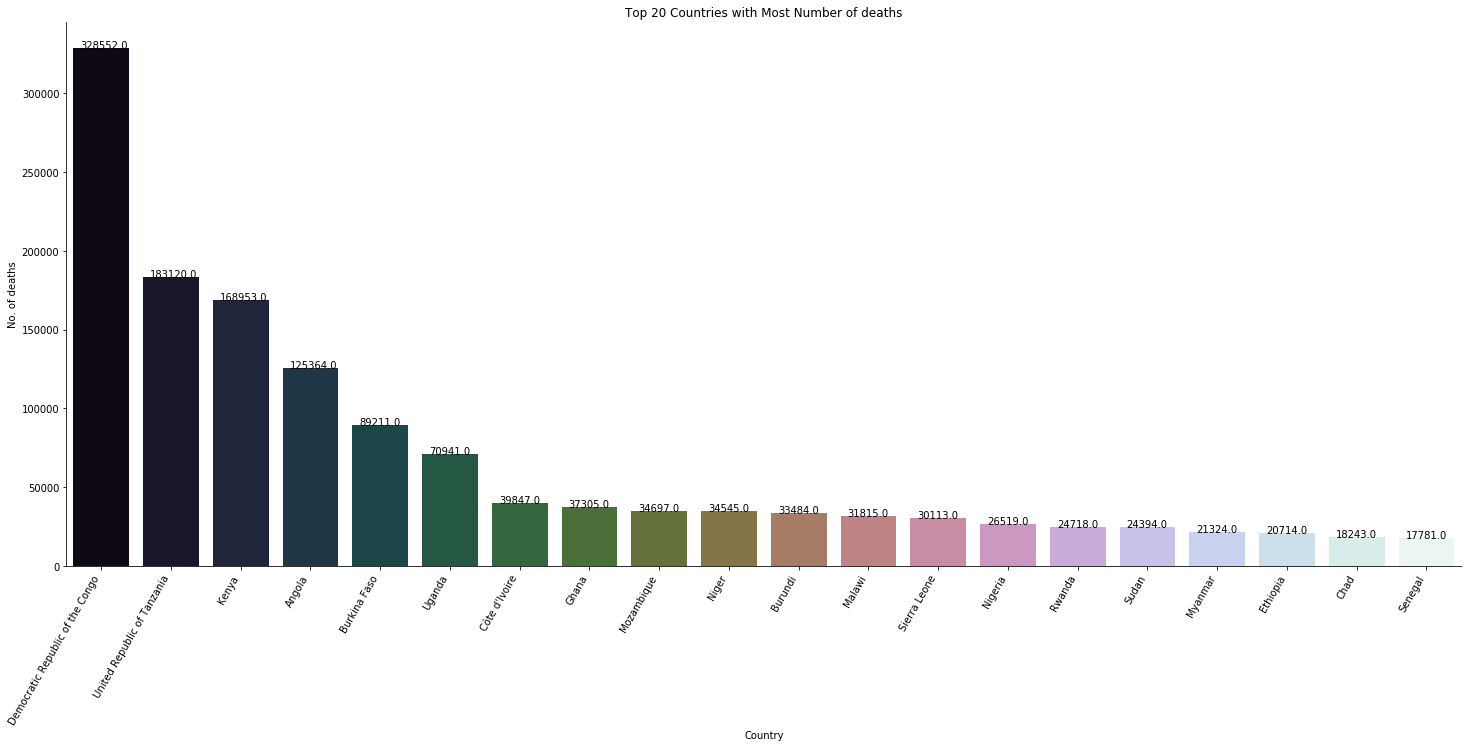

In [18]:
plt.figure(figsize = (25,10))
ax = sns.barplot(x="Country", y= "No. of deaths", data=df3[:20] ,palette = "cubehelix")
plt.title ("Top 20 Countries with Most Number of deaths")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of deaths")
data_graph(ax,0.1,10)
plt.show()

### ANALYSING AND VISUALISING DATA GROUPED WHO REGION WISE

In [19]:
df4 = df.groupby("WHO Region")["No. of cases","No. of deaths"].sum().reset_index()
df4.head()

C:\Users\Sanchit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,WHO Region,No. of cases,No. of deaths
0,Africa,545111852.0,1480850.0
1,Americas,13433321.0,11039.0
2,Eastern Mediterranean,15841260.0,26764.0
3,Europe,112675.0,25.0
4,South-East Asia,38305249.0,49802.0


In [20]:
df5 = df4[["WHO Region","No. of cases"]]
df5.head()

,WHO Region,No. of cases
0,Africa,545111852.0
1,Americas,13433321.0
2,Eastern Mediterranean,15841260.0
3,Europe,112675.0
4,South-East Asia,38305249.0


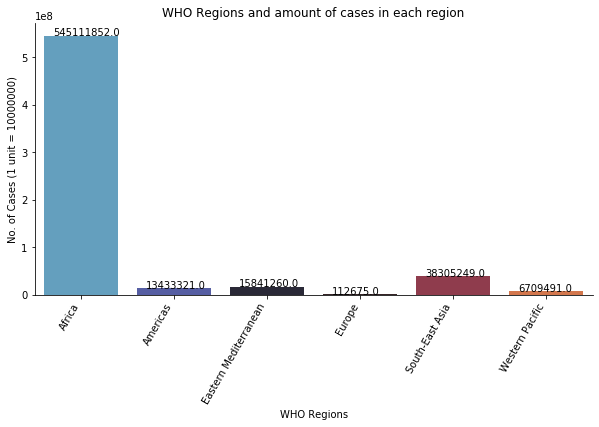

In [21]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="WHO Region", y= "No. of cases", data=df5 ,palette = "icefire")
plt.title ("WHO Regions and amount of cases in each region")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("WHO Regions")
plt.ylabel("No. of Cases (1 unit = 10000000)")
data_graph(ax,0.1,10)
plt.show()

In [22]:
df6 = df4[["WHO Region","No. of deaths"]]
df6.head()

,WHO Region,No. of deaths
0,Africa,1480850.0
1,Americas,11039.0
2,Eastern Mediterranean,26764.0
3,Europe,25.0
4,South-East Asia,49802.0


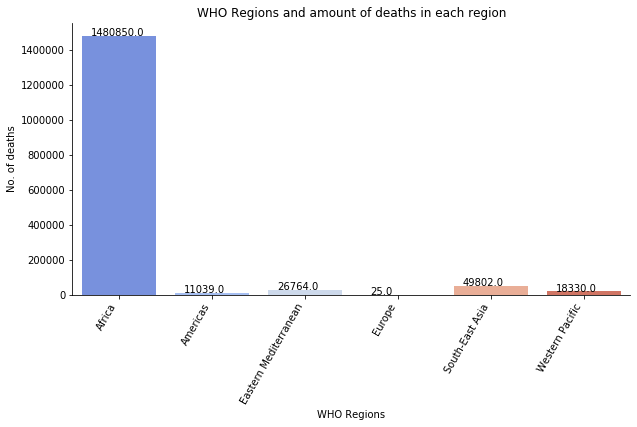

In [23]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="WHO Region", y= "No. of deaths", data=df6 ,palette = "coolwarm")
plt.title ("WHO Regions and amount of deaths in each region")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("WHO Regions")
plt.ylabel("No. of deaths")
data_graph(ax,0.1,10)
plt.show()

### ANALYSING AND VISUALISING DATA GROUPED YEAR WISE

In [24]:
df7 = df.groupby("Year")["No. of cases","No. of deaths"].sum().reset_index()
df7.head()

C:\Users\Sanchit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Year,No. of cases,No. of deaths
0,2000,5279182.0,21419.0
1,2001,5534764.0,26162.0
2,2002,5335247.0,70683.0
3,2003,8243454.0,91247.0
4,2004,9389638.0,87926.0


In [25]:
df8 = df7.set_index(["Year"])

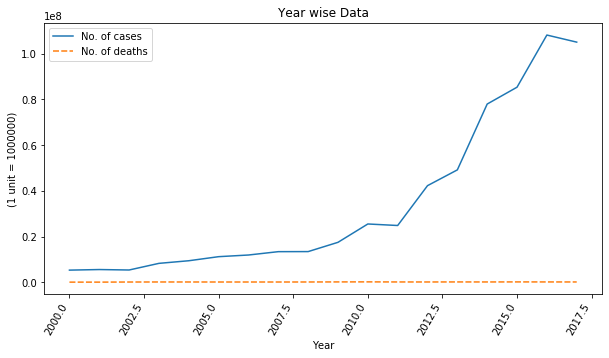

In [26]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(data=df8)
plt.title ("Year wise Data")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("(1 unit = 1000000)")
plt.show()

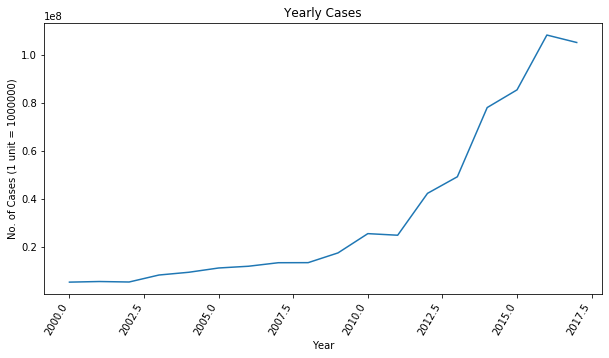

In [27]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "Year",y= "No. of cases",data=df7)
plt.title ("Yearly Cases")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("No. of Cases (1 unit = 1000000)")
plt.show()

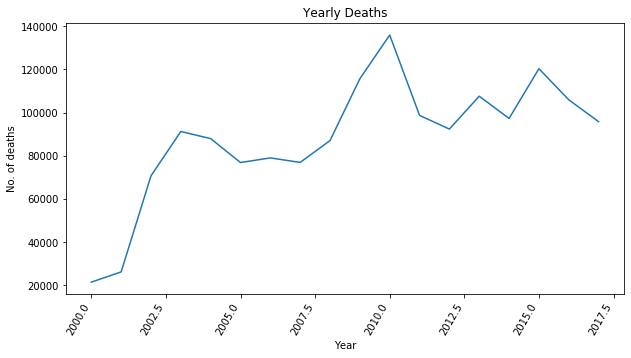

In [28]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "Year",y= "No. of deaths",data=df7)
plt.title ("Yearly Deaths")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("No. of deaths")
plt.show()

## WORKING WITH MODELS

For our models we use Random Forest, KNN and Stochastic Gradient Decent. With the Random forest algorithm we find the R2 score, by using KNN we use confusion matrix with it, and understand the use of it. For Stochatic Gradient Decent we create a ROC curve in order to calculate the auccracy of our model.

### ENCODING DATASET TO MAKE IT FIT FOR FITTING INTO MODELS

In [29]:
pred_df1 = df['Country'].str.get_dummies()
pred_df2 = df['WHO Region'].str.get_dummies()

In [30]:
frames = [df,pred_df1,pred_df2]
pred_df = pd.concat(frames,axis=1)
pred_df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region,Afghanistan,Algeria,Angola,Argentina,Armenia,...,Viet Nam,Yemen,Zambia,Zimbabwe,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Algeria,2017,0.0,0.0,Africa,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Angola,2017,3874892.0,13967.0,Africa,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Argentina,2017,0.0,1.0,Americas,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Bangladesh,2017,4893.0,13.0,South-East Asia,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
cols = ["Country","WHO Region"]
pred_df.drop(columns = cols, inplace=True)
pred_df.shape

(1554, 114)

### USING RANDOM FOREST AND FINDING R2 SCORE

In [32]:
x = pred_df.drop("No. of deaths",axis=1)
y = pred_df[["No. of deaths"]]

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1087, 113)
x_test : (467, 113)
y_train : (1087, 1)
y_test : (467, 1)


In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

C:\Users\Sanchit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.8959143504839948


### USING KNN AND CONFUSION MATRIX

In [35]:
x = pred_df.drop("No. of deaths",axis=1)
y = pred_df[["No. of deaths"]]

from sklearn import preprocessing
x = preprocessing.normalize(x)
y = preprocessing.normalize(y)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

C:\Users\Sanchit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [38]:
knn.score(x_test,y_test)

0.8265524625267666

In [39]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[ 94,  28],
       [ 53, 292]], dtype=int64)

In [40]:
import math
tn = con_mat[0][0]
fn = con_mat[1][0]
fp = con_mat[0][1]
tp = con_mat[1][1]

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(fp+tp)
recall = tp/(fn+tp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
f1 = 2*(precision*recall)/(precision+recall)
fpr = fp/(tn+fp)
fnr = fn/(tp+fn)
npv = tn/(tn+fn)
fdr = fp/(fp+tp)
mcc = (tp*tn)-(fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

print("Precision = {}, Accuracy = {}, F1 = {}, FPR = {}, FNR = {}, NPV = {}, FDR = {}, MCC = {}".format(precision,accuracy,f1,fpr,fnr,npv,fdr,mcc))
print()
print ("Sensitivity = {}, Specificity = {}".format(sensitivity, specificity))

Precision = 0.9125, Accuracy = 0.8265524625267666, F1 = 0.8781954887218045, FPR = 0.22950819672131148, FNR = 0.1536231884057971, NPV = 0.6394557823129252, FDR = 0.0875, MCC = 27447.966648852467

Sensitivity = 0.8463768115942029, Specificity = 0.7704918032786885


### USING STOCHASTIC GRADIENT DECENT AND ROC CURVE

In [41]:
x = pred_df.drop("No. of deaths",axis=1)
y = pred_df[["No. of deaths"]]

from sklearn import preprocessing
x = preprocessing.normalize(x)
y = preprocessing.normalize(y)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [43]:
from sklearn.linear_model import SGDClassifier 

from sklearn.metrics import roc_curve, auc

model = SGDClassifier(loss='hinge', class_weight='balanced')
model.fit(x_train, y_train)

y_train_pred = model.decision_function(x_train)    
y_test_pred = model.decision_function(x_test) 

C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


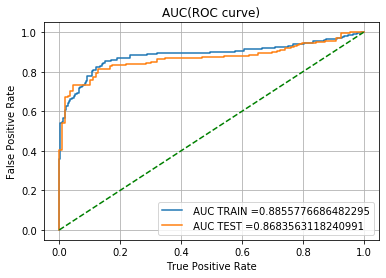

In [44]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()
